In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df=pd.read_csv("Salary_Data.csv")
df

,Years_Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


<AxesSubplot:>

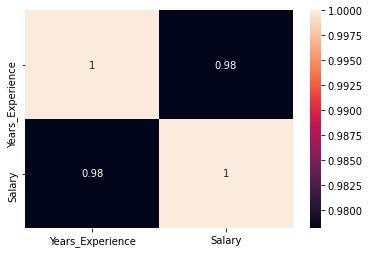

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=df.iloc[:,0:1]

In [24]:
y=df.iloc[:,-1]

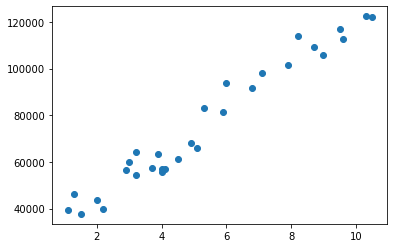

In [25]:
plt.scatter(x,y)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [34]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
predict=lr.predict(x_train)
predict

array([116180.82036723,  64030.39965754,  76136.74732229, 100349.44265179,
        53786.56701814,  74274.23229695,  56580.33955616,  68686.68722091,
       103143.21518981,  90105.61001239,  38886.44681538, 124562.13798128,
        54717.82453082,  47267.76442943,  81724.29239833,  82655.549911  ,
        61236.62711953,  56580.33955616, 110593.27529119,  45405.24940409,
        37023.93179003,  92899.38255041,  72411.7172716 ,  64030.39965754])

In [38]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    print(errors)
    print(np.mean(errors/test_labels))
    mape = 100 * np.mean(errors / test_labels)
    print(mape)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [40]:
lr_regressor=evaluate(lr,x_test,y_test)


2     3017.961841
28     308.622956
13    7880.657170
10     118.857855
26    1719.437145
24    1631.497247
Name: Salary, dtype: float64
0.042009635296206715
4.2009635296206715
Model Performance
Average Error: 2446.1724 degrees.
Accuracy = 95.80%.


In [49]:
from joblib import dump,load
dump(lr,'salarypredict.joblib')

['salarypredict.joblib']